In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pylab as plt
from modules.Utils import load_cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from modules.KerasCnnSpectralParameterization import CNN_Spectral_Param
from modules.KerasCnnWithSpectralPool import CNN_Spectral_Pool
from tensorflow.keras.applications.inception_v3 import preprocess_input
np.set_printoptions(precision = 1)
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# In the interest of training time, we only used 1 of 5 cifar10 batches. The important part of the experiment 
# is to compare the rates of convergence of training accuracy, so subsetting the training dataset for both 
# spectral and spatial models shouldn't impact the relationship between their train accuracy convergences.
xtrain, ytrain, xtest, ytest = load_cifar10(1, channels_last = True)
print('Training_data_shape: ', xtrain.shape)
print('Training_labels_shape: ', ytrain.shape)
print('Validation_data_shape: ', xtest.shape)
print('Validation_labels_shape: ', ytest.shape)

file already downloaded..
getting batch 1
Training_data_shape:  (10000, 32, 32, 3)
Training_labels_shape:  (10000,)
Validation_data_shape:  (10000, 32, 32, 3)
Validation_labels_shape:  (10000,)


# Generic Architecture: Spectral  Conv and Traditional Conv

In [9]:
# generate the model with spectral conv layer
# use_spectral_params indicate using spectral conv or not
generic_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 3, learning_rate = 5e-6, architect='generic', use_spectral_params=True)
model = generic_spectral._build_generic_model(True)
# Training process
b_size = 256
num_epoch = 100
history_generic_3_sc = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)
# # Using early stop method reducing the Learning Rate if result is not getting better. 
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='auto')
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-8, mode='auto', verbose=1)
# # Perform data augmentation
# train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) 
# # Train the model
# train_generator = train_datagen.flow(xtrain, ytrain, batch_size = b_size)
# step_size_train = train_generator.n//train_generator.batch_size
# # Recording the training process
# history = model.fit_generator(generator = train_generator,
#                     steps_per_epoch = step_size_train,
#                     epochs = num_epoch,
#                     validation_data=(xtest, ytest),
#                     callbacks=[reduce_lr, early_stop])

Epoch 1/100
40/40 [==============================] - 3s 48ms/step - loss: 3.6443 - accuracy: 0.1492 - val_loss: 2.5478 - val_accuracy: 0.2140
Epoch 2/100
40/40 [==============================] - 2s 38ms/step - loss: 2.4493 - accuracy: 0.2364 - val_loss: 2.2927 - val_accuracy: 0.2431
Epoch 3/100
40/40 [==============================] - 2s 38ms/step - loss: 2.2463 - accuracy: 0.2732 - val_loss: 2.1943 - val_accuracy: 0.2789
Epoch 4/100
40/40 [==============================] - 2s 38ms/step - loss: 2.1548 - accuracy: 0.3160 - val_loss: 2.1245 - val_accuracy: 0.3090
Epoch 5/100
40/40 [==============================] - 2s 38ms/step - loss: 2.0841 - accuracy: 0.3516 - val_loss: 2.0860 - val_accuracy: 0.3296
Epoch 6/100
40/40 [==============================] - 2s 38ms/step - loss: 2.0402 - accuracy: 0.3744 - val_loss: 2.0551 - val_accuracy: 0.3497
Epoch 7/100
40/40 [==============================] - 2s 39ms/step - loss: 2.0076 - accuracy: 0.3865 - val_loss: 2.0338 - val_accuracy: 0.3558
Epoch 

In [8]:
# generate the model without spectral conv layer
# use_spectral_params indicate using spectral conv or not
generic_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 3, architect='generic', use_spectral_params=False)
model = generic_spectral._build_generic_model(False)
# Training process
b_size = 512
num_epoch = 100 
history_generic_3 = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)
# # Using early stop method reducing the Learning Rate if result is not getting better. 
# eraly_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='auto')
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-7, mode='auto', verbose=1)
# # Perform data augmentation
# train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) 
# # Train the model
# train_generator = train_datagen.flow(xtrain, ytrain, batch_size = b_size)
# step_size_train = train_generator.n//train_generator.batch_size
# # Recording the training process
# history = model.fit_generator(generator = train_generator,
#                     steps_per_epoch = step_size_train,
#                     epochs = num_epoch,
#                     validation_data=(xtest, ytest),
#                     callbacks=[reduce_lr, eraly_stop])

Epoch 1/100
20/20 [==============================] - 4s 113ms/step - loss: 2.3085 - accuracy: 0.1113 - val_loss: 2.3050 - val_accuracy: 0.1112
Epoch 2/100
20/20 [==============================] - 1s 68ms/step - loss: 2.3036 - accuracy: 0.1166 - val_loss: 2.3008 - val_accuracy: 0.1204
Epoch 3/100
20/20 [==============================] - 1s 69ms/step - loss: 2.2999 - accuracy: 0.1234 - val_loss: 2.2968 - val_accuracy: 0.1280
Epoch 4/100
20/20 [==============================] - 1s 69ms/step - loss: 2.2957 - accuracy: 0.1313 - val_loss: 2.2930 - val_accuracy: 0.1369
Epoch 5/100
20/20 [==============================] - 1s 69ms/step - loss: 2.2913 - accuracy: 0.1461 - val_loss: 2.2893 - val_accuracy: 0.1503
Epoch 6/100
20/20 [==============================] - 1s 69ms/step - loss: 2.2875 - accuracy: 0.1621 - val_loss: 2.2857 - val_accuracy: 0.1622
Epoch 7/100
20/20 [==============================] - 1s 69ms/step - loss: 2.2842 - accuracy: 0.1782 - val_loss: 2.2820 - val_accuracy: 0.1740
Epoch

In [18]:
# generate the model with spectral conv layer
# use_spectral_params indicate using spectral conv or not
generic_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 6, architect='generic', use_spectral_params=True)
model = generic_spectral._build_generic_model(True)
# Training process
b_size = 256
num_epoch = 100
history_generic_6_sc = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)
# # Using early stop method reducing the Learning Rate if result is not getting better. 
# eraly_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='auto')
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-7, mode='auto', verbose=1)
# # Perform data augmentation
# train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) 
# # Train the model
# train_generator = train_datagen.flow(xtrain, ytrain, batch_size = b_size)
# step_size_train = train_generator.n//train_generator.batch_size
# # Recording the training process
# history = model.fit_generator(generator = train_generator,
#                     steps_per_epoch = step_size_train,
#                     epochs = num_epoch,
#                     validation_data=(xtest, ytest),
#                     callbacks=[reduce_lr, eraly_stop])

Epoch 1/100
40/40 [==============================] - 4s 80ms/step - loss: 7.7244 - accuracy: 0.1144 - val_loss: 5.8495 - val_accuracy: 0.1155
Epoch 2/100
40/40 [==============================] - 3s 70ms/step - loss: 5.4380 - accuracy: 0.1150 - val_loss: 4.4851 - val_accuracy: 0.1250
Epoch 3/100
40/40 [==============================] - 3s 70ms/step - loss: 4.2533 - accuracy: 0.1374 - val_loss: 3.7014 - val_accuracy: 0.1383
Epoch 4/100
40/40 [==============================] - 3s 70ms/step - loss: 3.5799 - accuracy: 0.1429 - val_loss: 3.2269 - val_accuracy: 0.1517
Epoch 5/100
40/40 [==============================] - 3s 70ms/step - loss: 3.1372 - accuracy: 0.1615 - val_loss: 2.9291 - val_accuracy: 0.1596
Epoch 6/100
40/40 [==============================] - 3s 70ms/step - loss: 2.8653 - accuracy: 0.1715 - val_loss: 2.7344 - val_accuracy: 0.1703
Epoch 7/100
40/40 [==============================] - 3s 70ms/step - loss: 2.6918 - accuracy: 0.1874 - val_loss: 2.6050 - val_accuracy: 0.1770
Epoch 

In [13]:
# generate the model without spectral conv layer
# use_spectral_params indicate using spectral conv or not
generic_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 6, architect='generic', use_spectral_params=False)
model = generic_spectral._build_generic_model(False)
model.summary()
# Training process
b_size = 512
num_epoch = 100 
history_generic_6 = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)
# # Using early stop method reducing the Learning Rate if result is not getting better. 
# eraly_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='auto')
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=0.0004, patience=2, factor=0.1, min_lr=1e-7, mode='auto', verbose=1)
# # Perform data augmentation
# train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) 
# # Train the model
# train_generator = train_datagen.flow(xtrain, ytrain, batch_size = b_size)
# step_size_train = train_generator.n//train_generator.batch_size
# # Recording the training process
# history = model.fit_generator(generator = train_generator,
#                     steps_per_epoch = step_size_train,
#                     epochs = num_epoch,
#                     validation_data=(xtest, ytest),
#                     callbacks=[reduce_lr, eraly_stop])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 96)        10464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 192)       663744    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 192)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              12583936  
_________________________________________________________________
dense_23 (Dense)             (None, 512)              

# Deep Architecture: Spectral  Conv and Traditional Conv

In [13]:
# generate the model with spectral conv layer
# use_spectral_params indicate using spectral conv or not
deep_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 3, learning_rate = 5e-6, architect='generic', use_spectral_params=True)
model = deep_spectral._build_deep_model(True)
# Training process
b_size = 512
num_epoch = 100
history_deep_3_sc = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 285ms/step - loss: 3.6160 - accuracy: 0.1064 - val_loss: 2.8919 - val_accuracy: 0.1000
Epoch 2/100
20/20 [==============================] - 5s 267ms/step - loss: 2.8319 - accuracy: 0.1049 - val_loss: 2.6608 - val_accuracy: 0.1003
Epoch 3/100
20/20 [==============================] - 5s 266ms/step - loss: 2.6440 - accuracy: 0.0982 - val_loss: 2.5314 - val_accuracy: 0.0933
Epoch 4/100
20/20 [==============================] - 5s 266ms/step - loss: 2.5026 - accuracy: 0.0922 - val_loss: 2.4432 - val_accuracy: 0.1035
Epoch 5/100
20/20 [==============================] - 5s 266ms/step - loss: 2.4167 - accuracy: 0.1084 - val_loss: 2.3748 - val_accuracy: 0.1039
Epoch 6/100
20/20 [==============================] - 5s 265ms/step - loss: 2.3580 - accuracy: 0.1000 - val_loss: 2.3243 - val_accuracy: 0.0999
Epoch 7/100
20/20 [==============================] - 5s 266ms/step - loss: 2.3180 - accuracy: 0.1034 - val_loss: 2.2979 - val_accuracy: 0.1028

Epoch 58/100
20/20 [==============================] - 5s 268ms/step - loss: 2.1730 - accuracy: 0.2171 - val_loss: 2.1728 - val_accuracy: 0.2103
Epoch 59/100
20/20 [==============================] - 5s 268ms/step - loss: 2.1642 - accuracy: 0.2185 - val_loss: 2.1711 - val_accuracy: 0.2123
Epoch 60/100
20/20 [==============================] - 5s 267ms/step - loss: 2.1650 - accuracy: 0.2249 - val_loss: 2.1696 - val_accuracy: 0.2134
Epoch 61/100
20/20 [==============================] - 5s 268ms/step - loss: 2.1662 - accuracy: 0.2191 - val_loss: 2.1681 - val_accuracy: 0.2130
Epoch 62/100
20/20 [==============================] - 5s 267ms/step - loss: 2.1655 - accuracy: 0.2178 - val_loss: 2.1667 - val_accuracy: 0.2157
Epoch 63/100
20/20 [==============================] - 5s 267ms/step - loss: 2.1627 - accuracy: 0.2240 - val_loss: 2.1654 - val_accuracy: 0.2167
Epoch 64/100
20/20 [==============================] - 5s 269ms/step - loss: 2.1617 - accuracy: 0.2205 - val_loss: 2.1637 - val_accuracy:

In [14]:
# generate the model without spectral conv layer
# use_spectral_params indicate using spectral conv or not
deep_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 3, architect='generic', use_spectral_params=False)
model = deep_spectral._build_deep_model(False)
# Training process
b_size = 512
num_epoch = 100 
history_deep_3 = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 359ms/step - loss: 3.7524 - accuracy: 0.1048 - val_loss: 2.7495 - val_accuracy: 0.1000
Epoch 2/100
20/20 [==============================] - 4s 224ms/step - loss: 2.6740 - accuracy: 0.1036 - val_loss: 2.5234 - val_accuracy: 0.1000
Epoch 3/100
20/20 [==============================] - 4s 223ms/step - loss: 2.4875 - accuracy: 0.1012 - val_loss: 2.4098 - val_accuracy: 0.1007
Epoch 4/100
20/20 [==============================] - 4s 224ms/step - loss: 2.3856 - accuracy: 0.1029 - val_loss: 2.3442 - val_accuracy: 0.1073
Epoch 5/100
20/20 [==============================] - 4s 224ms/step - loss: 2.3338 - accuracy: 0.1105 - val_loss: 2.3091 - val_accuracy: 0.1243
Epoch 6/100
20/20 [==============================] - 4s 224ms/step - loss: 2.2964 - accuracy: 0.1319 - val_loss: 2.2905 - val_accuracy: 0.1321
Epoch 7/100
20/20 [==============================] - 4s 224ms/step - loss: 2.2838 - accuracy: 0.1413 - val_loss: 2.2792 - val_accuracy: 0.137

Epoch 58/100
20/20 [==============================] - 4s 224ms/step - loss: 2.0645 - accuracy: 0.2637 - val_loss: 2.0811 - val_accuracy: 0.2511
Epoch 59/100
20/20 [==============================] - 4s 224ms/step - loss: 2.0615 - accuracy: 0.2595 - val_loss: 2.0787 - val_accuracy: 0.2507
Epoch 60/100
20/20 [==============================] - 4s 224ms/step - loss: 2.0623 - accuracy: 0.2613 - val_loss: 2.0767 - val_accuracy: 0.2517
Epoch 61/100
20/20 [==============================] - 4s 224ms/step - loss: 2.0641 - accuracy: 0.2579 - val_loss: 2.0753 - val_accuracy: 0.2517
Epoch 62/100
20/20 [==============================] - 4s 224ms/step - loss: 2.0584 - accuracy: 0.2658 - val_loss: 2.0732 - val_accuracy: 0.2523
Epoch 63/100
20/20 [==============================] - 4s 223ms/step - loss: 2.0565 - accuracy: 0.2580 - val_loss: 2.0710 - val_accuracy: 0.2530
Epoch 64/100
20/20 [==============================] - 4s 224ms/step - loss: 2.0586 - accuracy: 0.2648 - val_loss: 2.0689 - val_accuracy:

In [15]:
# generate the model with spectral conv layer
# use_spectral_params indicate using spectral conv or not
deep_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 6, architect='generic', use_spectral_params=True)
model = deep_spectral._build_deep_model(True)
# Training process
b_size = 512
num_epoch = 100 
history_deep_6_sc = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)

Epoch 1/100
20/20 [==============================] - 36s 1s/step - loss: 2.5782 - accuracy: 0.1036 - val_loss: 2.4561 - val_accuracy: 0.1000
Epoch 2/100
20/20 [==============================] - 16s 790ms/step - loss: 2.4278 - accuracy: 0.1045 - val_loss: 2.3773 - val_accuracy: 0.1000
Epoch 3/100
20/20 [==============================] - 16s 791ms/step - loss: 2.3661 - accuracy: 0.1006 - val_loss: 2.3396 - val_accuracy: 0.1000
Epoch 4/100
20/20 [==============================] - 16s 794ms/step - loss: 2.3321 - accuracy: 0.1021 - val_loss: 2.3199 - val_accuracy: 0.1001
Epoch 5/100
20/20 [==============================] - 16s 796ms/step - loss: 2.3151 - accuracy: 0.1011 - val_loss: 2.3092 - val_accuracy: 0.1003
Epoch 6/100
20/20 [==============================] - 16s 796ms/step - loss: 2.3063 - accuracy: 0.1028 - val_loss: 2.3030 - val_accuracy: 0.0970
Epoch 7/100
20/20 [==============================] - 16s 794ms/step - loss: 2.3002 - accuracy: 0.1019 - val_loss: 2.2993 - val_accuracy: 0.

In [21]:
# generate the model without spectral conv layer
# use_spectral_params indicate using spectral conv or not
deep_spectral = CNN_Spectral_Param(num_out=10, kernel_size = 6, architect='generic', use_spectral_params=False)
model = deep_spectral._build_deep_model(False)
# Training process
b_size = 512
num_epoch = 100 
history_deep_6 = model.fit(xtrain, tf.one_hot(indices=ytrain, depth=10), batch_size=b_size, 
                    validation_data=(xtest, tf.one_hot(indices=ytest, depth=10)), epochs=num_epoch, verbose=1)

Epoch 1/100
20/20 [==============================] - 9s 428ms/step - loss: 2.5680 - accuracy: 0.0963 - val_loss: 2.4075 - val_accuracy: 0.0972
Epoch 2/100
20/20 [==============================] - 8s 422ms/step - loss: 2.3973 - accuracy: 0.0897 - val_loss: 2.3311 - val_accuracy: 0.1316
Epoch 3/100
20/20 [==============================] - 9s 432ms/step - loss: 2.3217 - accuracy: 0.1478 - val_loss: 2.2933 - val_accuracy: 0.1581
Epoch 4/100
20/20 [==============================] - 9s 437ms/step - loss: 2.2845 - accuracy: 0.1668 - val_loss: 2.2714 - val_accuracy: 0.1729
Epoch 5/100
20/20 [==============================] - 9s 431ms/step - loss: 2.2629 - accuracy: 0.1886 - val_loss: 2.2557 - val_accuracy: 0.1867
Epoch 6/100
20/20 [==============================] - 8s 421ms/step - loss: 2.2488 - accuracy: 0.1958 - val_loss: 2.2430 - val_accuracy: 0.1976
Epoch 7/100
20/20 [==============================] - 8s 419ms/step - loss: 2.2391 - accuracy: 0.2002 - val_loss: 2.2319 - val_accuracy: 0.2026

Epoch 58/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9426 - accuracy: 0.3097 - val_loss: 1.9531 - val_accuracy: 0.3143
Epoch 59/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9457 - accuracy: 0.3104 - val_loss: 1.9505 - val_accuracy: 0.3160
Epoch 60/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9338 - accuracy: 0.3156 - val_loss: 1.9482 - val_accuracy: 0.3163
Epoch 61/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9325 - accuracy: 0.3135 - val_loss: 1.9455 - val_accuracy: 0.3172
Epoch 62/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9214 - accuracy: 0.3238 - val_loss: 1.9434 - val_accuracy: 0.3161
Epoch 63/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9233 - accuracy: 0.3176 - val_loss: 1.9410 - val_accuracy: 0.3173
Epoch 64/100
20/20 [==============================] - 8s 420ms/step - loss: 1.9225 - accuracy: 0.3198 - val_loss: 1.9387 - val_accuracy:

# Spectral Pooling Architecture

In [3]:
# Just using 1 batch from cifar10 to save time (these models are extremely computationally intensive)
xtrain_NHWC, ytrain_NHWC, xtest_NHWC, ytest_NHWC = load_cifar10(1, channels_last=True)
print(xtrain_NHWC.shape)
print(ytrain_NHWC.shape)
print(xtest_NHWC.shape)
print(ytest_NHWC.shape)

file already downloaded..
getting batch 1
(10000, 32, 32, 3)
(10000,)
(10000, 32, 32, 3)
(10000,)


In [5]:
import logging
tf.get_logger().setLevel(logging.ERROR)
# Train the model with spectral pooling
model = CNN_Spectral_Pool(M=5,l2_norm=1e-3, use_parameterization = True)
for layer in model.layers:
    layer.trainable = True
# Instantiate an optimizer
adam = tf.keras.optimizers.Adam(learning_rate=1e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
#sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Instantiate a loss function.
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# Instantiate a training accuracy metric
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
# Instantiate a validation accuracy metric
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
# model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
model.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
history_sp = model.fit(xtrain_NHWC, tf.one_hot(indices=ytrain_NHWC, depth=10), batch_size=256, epochs=100, 
                    validation_data=(xtest_NHWC, tf.one_hot(indices=ytest_NHWC, depth=10)), verbose=1)

Epoch 1/100
40/40 [==============================] - 3s 21ms/step - loss: 2.6464 - accuracy: 0.1027 - val_loss: 2.5917 - val_accuracy: 0.1153
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 2.5826 - accuracy: 0.1150 - val_loss: 2.5584 - val_accuracy: 0.1258
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 2.5493 - accuracy: 0.1280 - val_loss: 2.5327 - val_accuracy: 0.1384
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 2.5228 - accuracy: 0.1420 - val_loss: 2.5088 - val_accuracy: 0.1468
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 2.5033 - accuracy: 0.1443 - val_loss: 2.4814 - val_accuracy: 0.1532
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 2.4654 - accuracy: 0.1655 - val_loss: 2.4522 - val_accuracy: 0.1704
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 2.4416 - accuracy: 0.1811 - val_loss: 2.4277 - val_accuracy: 0.1863
Epoch 8/100

Epoch 59/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0633 - accuracy: 0.3350 - val_loss: 2.0863 - val_accuracy: 0.3252
Epoch 60/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0610 - accuracy: 0.3412 - val_loss: 2.0842 - val_accuracy: 0.3269
Epoch 61/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0611 - accuracy: 0.3438 - val_loss: 2.0824 - val_accuracy: 0.3277
Epoch 62/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0680 - accuracy: 0.3373 - val_loss: 2.0805 - val_accuracy: 0.3271
Epoch 63/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0553 - accuracy: 0.3460 - val_loss: 2.0790 - val_accuracy: 0.3277
Epoch 64/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0665 - accuracy: 0.3346 - val_loss: 2.0772 - val_accuracy: 0.3269
Epoch 65/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0585 - accuracy: 0.3413 - val_loss: 2.0752 - val_accuracy: 0.3308
Epoch 

In [6]:
import logging
tf.get_logger().setLevel(logging.ERROR)
# Train the model with spectral pooling
model = CNN_Spectral_Pool(M=5,l2_norm=1e-3, use_parameterization = False)
for layer in model.layers:
    layer.trainable = True
# Instantiate an optimizer
adam = tf.keras.optimizers.Adam(learning_rate=1e-6, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
#sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Instantiate a loss function.
loss_fn = tf.keras.losses.CategoricalCrossentropy()
# Instantiate a training accuracy metric
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
# Instantiate a validation accuracy metric
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
# model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
model.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
history_no_sp = model.fit(xtrain_NHWC, tf.one_hot(indices=ytrain_NHWC, depth=10), batch_size=256, epochs=100, 
                    validation_data=(xtest_NHWC, tf.one_hot(indices=ytest_NHWC, depth=10)), verbose=1)

Epoch 1/100
40/40 [==============================] - 2s 22ms/step - loss: 2.5194 - accuracy: 0.1059 - val_loss: 2.4991 - val_accuracy: 0.1321
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 2.4883 - accuracy: 0.1390 - val_loss: 2.4732 - val_accuracy: 0.1491
Epoch 3/100
40/40 [==============================] - 0s 8ms/step - loss: 2.4629 - accuracy: 0.1598 - val_loss: 2.4506 - val_accuracy: 0.1559
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 2.4415 - accuracy: 0.1661 - val_loss: 2.4308 - val_accuracy: 0.1639
Epoch 5/100
40/40 [==============================] - 0s 8ms/step - loss: 2.4196 - accuracy: 0.1693 - val_loss: 2.4130 - val_accuracy: 0.1694
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 2.4057 - accuracy: 0.1701 - val_loss: 2.3970 - val_accuracy: 0.1736
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 2.3834 - accuracy: 0.1890 - val_loss: 2.3816 - val_accuracy: 0.1777
Epoch 8/100


Epoch 59/100
40/40 [==============================] - 0s 7ms/step - loss: 2.1005 - accuracy: 0.3419 - val_loss: 2.1274 - val_accuracy: 0.3159
Epoch 60/100
40/40 [==============================] - 0s 7ms/step - loss: 2.1080 - accuracy: 0.3338 - val_loss: 2.1259 - val_accuracy: 0.3174
Epoch 61/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1057 - accuracy: 0.3321 - val_loss: 2.1244 - val_accuracy: 0.3157
Epoch 62/100
40/40 [==============================] - 0s 7ms/step - loss: 2.1008 - accuracy: 0.3386 - val_loss: 2.1230 - val_accuracy: 0.3169
Epoch 63/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1036 - accuracy: 0.3359 - val_loss: 2.1215 - val_accuracy: 0.3189
Epoch 64/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1021 - accuracy: 0.3333 - val_loss: 2.1201 - val_accuracy: 0.3179
Epoch 65/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1041 - accuracy: 0.3382 - val_loss: 2.1187 - val_accuracy: 0.3201
Epoch 

# Recreate graph from training result

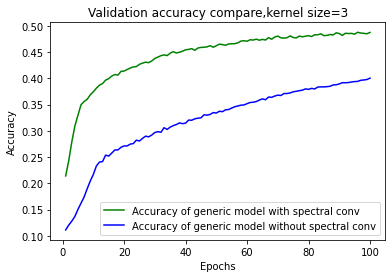

In [12]:
# Compare between using/without using spectral parameter under generic model, kernel size 3
acc_generic_3_sc = history_generic_3_sc.history['val_accuracy']
acc_generic_3 = history_generic_3.history['val_accuracy']
total_epochs = range(1,100+1)
plt.plot(total_epochs, acc_generic_3_sc, 'g', label='Accuracy of generic model with spectral conv')
plt.plot(total_epochs, acc_generic_3, 'b', label='Accuracy of generic model without spectral conv')
plt.title('Validation accuracy compare,kernel size=3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

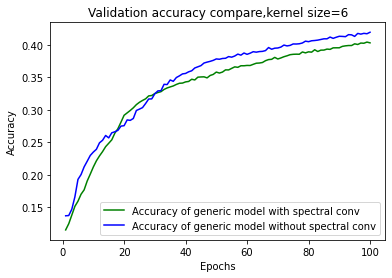

In [19]:
# Compare between using/without using spectral parameter under generic model, kernel size 6
acc_generic_6_sc = history_generic_6_sc.history['val_accuracy']
acc_generic_6 = history_generic_6.history['val_accuracy']
total_epochs = range(1,100+1)
plt.plot(total_epochs, acc_generic_6_sc, 'g', label='Accuracy of generic model with spectral conv')
plt.plot(total_epochs, acc_generic_6, 'b', label='Accuracy of generic model without spectral conv')
plt.title('Validation accuracy compare,kernel size=6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

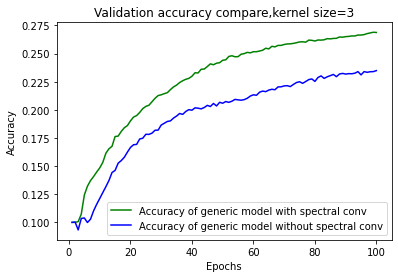

In [18]:
# Compare between using/without using spectral parameter under deep model, kernel size 3
acc_deep_3_s = history_deep_3_sc.history['val_accuracy']
acc_deep_3_c = history_deep_3.history['val_accuracy']
total_epochs = range(1,100+1)
plt.plot(total_epochs, acc_deep_3_c, 'g', label='Accuracy of generic model with spectral conv')
plt.plot(total_epochs, acc_deep_3_s, 'b', label='Accuracy of generic model without spectral conv')
plt.title('Validation accuracy compare,kernel size=3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

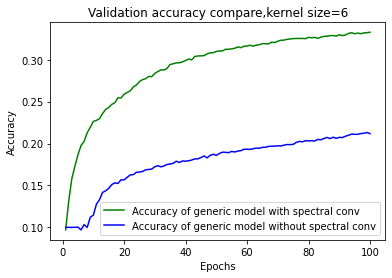

In [22]:
# Compare between using/without using spectral parameter under deep model, kernel size 6
acc_deep_6_s = history_deep_6_sc.history['val_accuracy']
acc_deep_6_c = history_deep_6.history['val_accuracy']
total_epochs = range(1,100+1)
plt.plot(total_epochs, acc_deep_6_c, 'g', label='Accuracy of generic model with spectral conv')
plt.plot(total_epochs, acc_deep_6_s, 'b', label='Accuracy of generic model without spectral conv')
plt.title('Validation accuracy compare,kernel size=6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

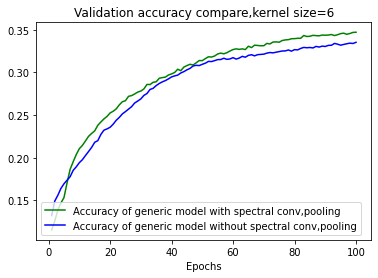

In [8]:
# Compare between using/without using spectral pooling under generic model, kernel size 3
acc_generic_3_sp = history_sp.history['val_accuracy']
acc_generic_3_n = history_no_sp.history['val_accuracy']
total_epochs = range(1,100+1)
plt.plot(total_epochs, acc_generic_3_sp, 'g', label='Accuracy of generic model with spectral conv,pooling')
plt.plot(total_epochs, acc_generic_3_n, 'b', label='Accuracy of generic model without spectral conv,pooling')
plt.title('Validation accuracy compare,kernel size=6')
plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
plt.legend()
plt.show()